In [1]:
import numpy as np
from steps import *
from tqdm import tqdm
from optimal import *
import matplotlib.pyplot as plt
import optuna
import pickle

In [2]:
d = 20
opt_r = 5
m = 20
T_r = 100
times = 10
opt_sigma = 3
sigma_type = matrix_type.DIAG
s_type = matrix_type.IDENTITY

name = f"optuna_optimization_d={d}_r={opt_r}_sigma={sigma_type}_s={s_type}_m={m}_Tr={T_r}_var={opt_sigma}"
study = optuna.create_study(study_name=f'{name}',
                            storage=f'sqlite:///./../optuna/{name}.db ',
                            direction='minimize', load_if_exists=True)

[I 2023-05-17 18:24:57,605] Using an existing study with name 'optuna_optimization_d=20_r=5_sigma=matrix_type.DIAG_s=matrix_type.IDENTITY_m=20_Tr=100_var=3' instead of creating a new one.


In [3]:
s_skew_list = np.linspace(0, 3, 3*2+1)
res_s = np.zeros([len(s_skew_list), times])
res_basic = np.zeros([len(s_skew_list), times])

for t, s_skew in enumerate(s_skew_list):
    print(f"*** {s_skew} ***")
    if s_skew == 0:
        s_skew = 1e-10
    basic_regrets, s_regrets = run_algorithm_S(d=d, r=opt_r, m=m, s_skew=s_skew,
                                               sigma_type=matrix_type.DIAG, s_type=matrix_type.DIAG,
                                               times=times, d_sigma=opt_sigma, T_r=T_r, **study.best_params)
    res_basic[t] = basic_regrets
    res_s[t] = s_regrets

*** 0.0 ***
S regret = 0.15558600399351336 ; basic regret = 0.16043493479735182
S regret = 0.19431455629567118 ; basic regret = 0.2124819704658281
S regret = 0.33809947112211236 ; basic regret = 0.3436769422958251
S regret = 0.0469907552462368 ; basic regret = 0.05066326826911868
S regret = 0.09558717721626898 ; basic regret = 0.09401100844134333
S regret = 0.3493184297768727 ; basic regret = 0.3531782848854095
S regret = 0.4592695122698631 ; basic regret = 0.45765713359493054
S regret = 0.4788338874435661 ; basic regret = 0.4651783626491871
S regret = 0.1294755710101225 ; basic regret = 0.1422006551438598
S regret = 0.2557790911667975 ; basic regret = 0.27061869468045785
*** 0.5 ***
S regret = 0.12703909468013358 ; basic regret = 0.15861922470239326
S regret = 0.2066061416971697 ; basic regret = 0.2669209548739254
S regret = 0.34663622119592324 ; basic regret = 0.483736056370266
S regret = 0.06572414063309892 ; basic regret = 0.08317711795330959
S regret = 0.05313204769812976 ; basic 

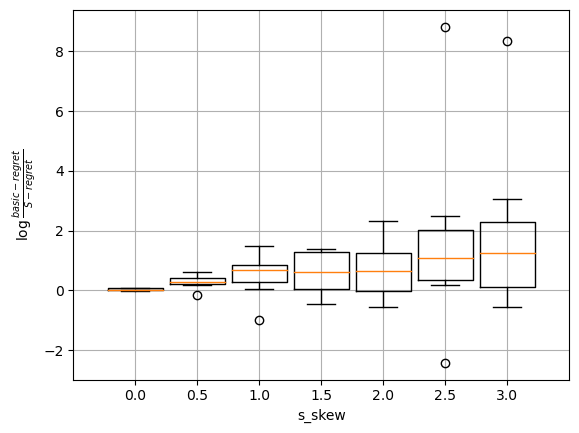

In [23]:
p = np.log(res_basic / res_s)
plt.boxplot(p.T, positions=s_skew_list)
plt.grid()
plt.xlabel('s_skew')
plt.ylabel(r'$\log\frac{basic-regret}{S-regret}$')
plt.show()